# Data analysis and processing

In [167]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
data = pd.read_csv('/kaggle/input/house-price-prediction-challenge/train.csv')
data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [170]:
data['CITY'] = data['ADDRESS'].str.split(',').str.get(-1)
data = data.drop(columns=['ADDRESS'])
data.head(5)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5,Kolkata


In [171]:
data['CITY'].value_counts()

CITY
Bangalore      4340
Lalitpur       2993
Mumbai         2023
Pune           1991
Noida          1767
               ... 
Bhadrak           1
Kurukshetra       1
Dibrugarh         1
Sagar             1
Washim            1
Name: count, Length: 256, dtype: int64

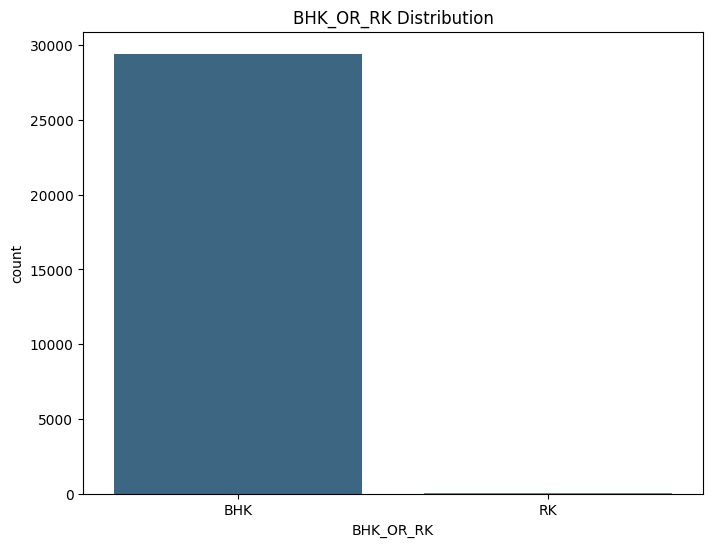

In [172]:
plt.figure(figsize=(8, 6))
sns.countplot(x='BHK_OR_RK', data=data, palette="viridis")
plt.title("BHK_OR_RK Distribution")
plt.show()

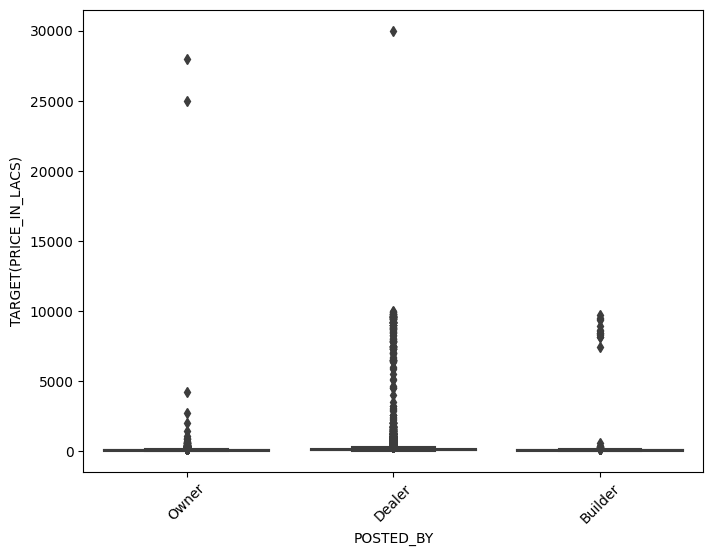

In [173]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='POSTED_BY', y='TARGET(PRICE_IN_LACS)', data=data)
plt.xticks(rotation=45)
plt.show()

In [174]:
data = data.drop(columns=['BHK_OR_RK', 'CITY'])
data.head(10)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0
1,Dealer,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0
2,Owner,0,0,2,933.159722,1,1,12.778033,77.632191,43.0
3,Owner,0,1,2,929.921143,1,1,28.642300,77.344500,62.5
4,Dealer,1,0,2,999.009247,0,1,22.592200,88.484911,60.5
5,Owner,0,0,3,1250.000000,1,1,10.033280,76.282571,42.0
6,Dealer,0,0,3,1495.053957,1,1,26.916347,75.795600,66.5
7,Owner,0,1,3,1181.012946,1,1,30.740000,76.650000,52.0
8,Dealer,0,1,2,1040.000000,1,1,13.054202,77.674002,41.6
9,Owner,0,1,2,879.120879,1,1,12.951610,80.140970,36.0


In [175]:
#Encoder train
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

corr_data = data.copy()

encoded_posted_by = encoder.fit_transform(corr_data[['POSTED_BY']])
encoded_columns = encoder.get_feature_names_out(['POSTED_BY'])

encoded_df = pd.DataFrame(encoded_posted_by, columns=encoded_columns)
corr_data = pd.concat([corr_data.drop('POSTED_BY', axis=1), encoded_df], axis=1)


corr_data.head(5)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,0.0,0.0,1.0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,0.0,1.0,0.0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,0.0,0.0,1.0
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,0.0,0.0,1.0
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,0.0,1.0,0.0


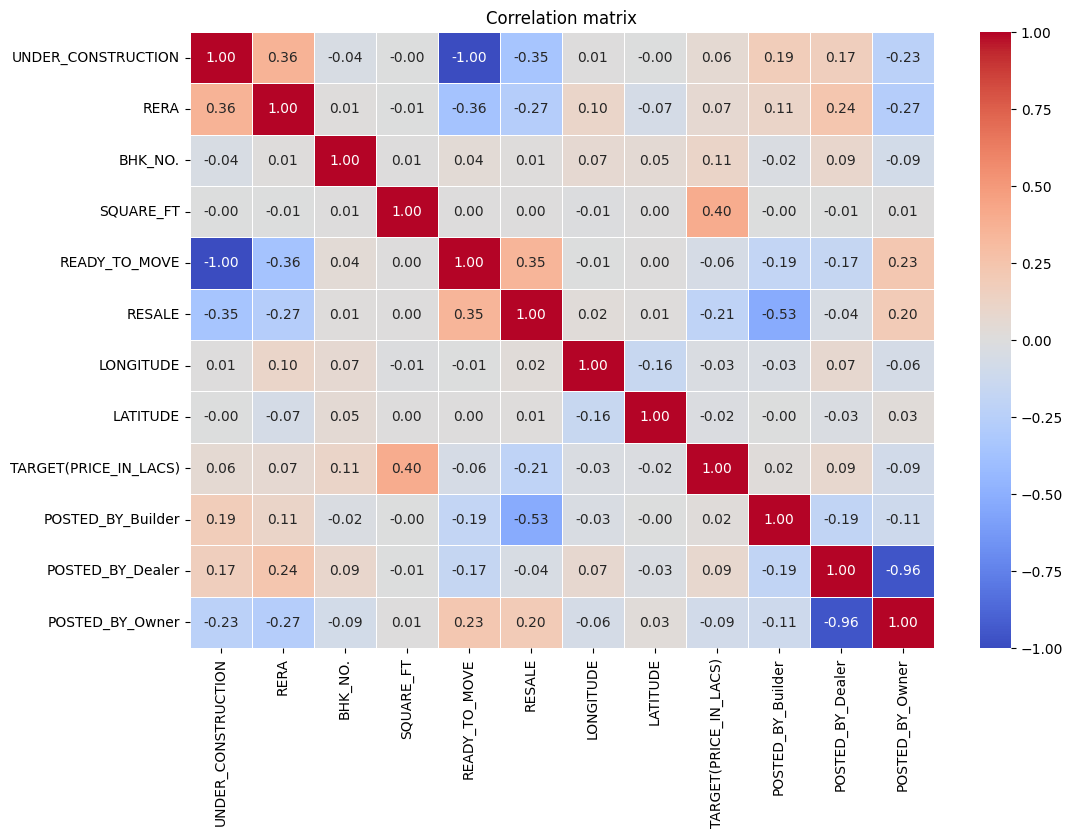

In [176]:
#Correlation matrix
correlation_matrix = corr_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation matrix")
plt.show()


# Model training

In [177]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(corr_data, labels, test_size=0.2, random_state=42)

#model parameters

models_params = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}
    },
    "XGBoost": {
        "model": XGBRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100, 150],
            "max_depth": [3, 5, 7],
            "learning_rate": [0.01, 0.1, 0.2]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            "n_estimators": [50, 100, 150],
            "max_depth": [3, 5, 7],
            "learning_rate": [0.01, 0.1, 0.2]
        }
    }
}


def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2


results = []

models = {}

#Model training
for model_name, config in models_params.items():
    print(f"Training {model_name}...")
    grid = GridSearchCV(config["model"], config["params"], cv=3, scoring='r2', verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    mae, rmse, r2 = evaluate_model(best_model, X_train, X_test, y_train, y_test)
    
    models[model_name] = best_model
    
    results.append({
        "Model": model_name,
        "MAE": mae,
        "RMSE": rmse,
        "R2 Score": r2
    })

results_df = pd.DataFrame(results)
print("\nGridSearch Results:")
print(results_df)


Training Linear Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Training XGBoost...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Training Gradient Boosting...
Fitting 3 folds for each of 27 candidates, totalling 81 fits

GridSearch Results:
               Model           MAE          RMSE  R2 Score
0  Linear Regression  1.049158e-11  4.197898e-10  1.000000
1            XGBoost  1.193016e+01  3.688485e+02  0.750308
2  Gradient Boosting  2.409965e+00  1.164090e+02  0.975130


Visualizing predictions for Linear Regression...


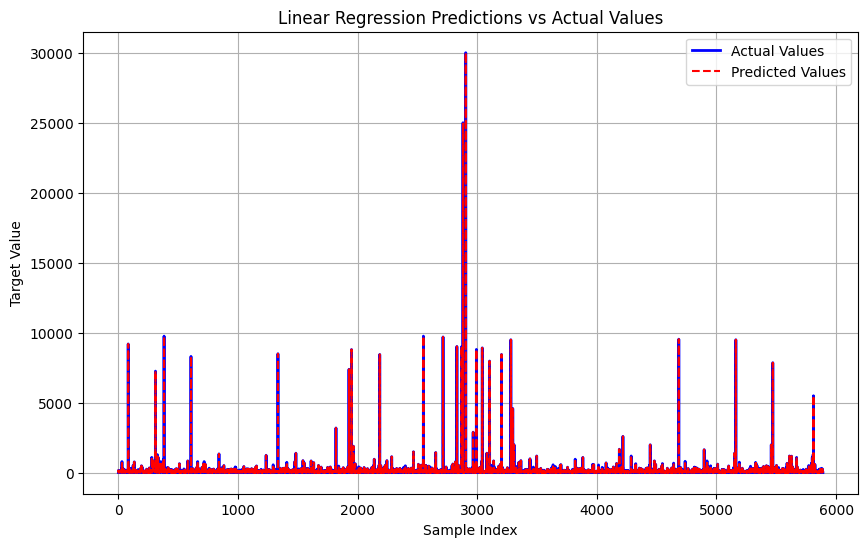

Visualizing predictions for XGBoost...


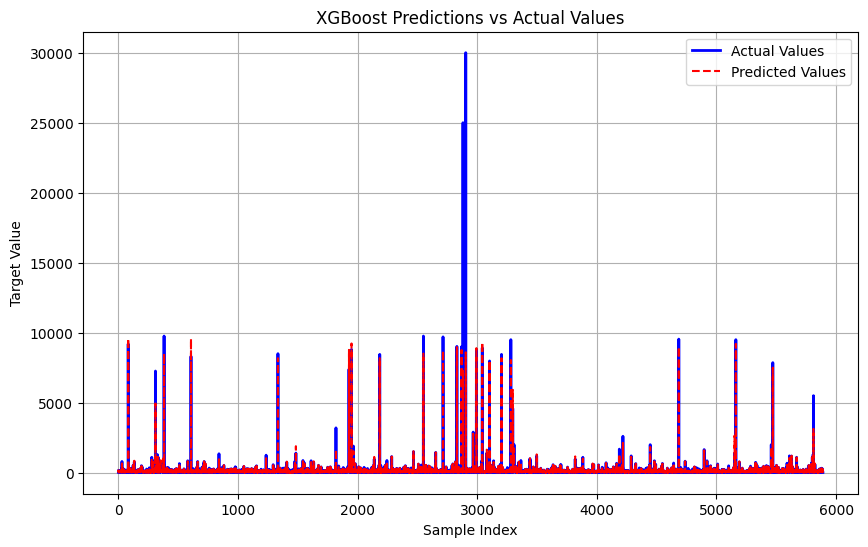

Visualizing predictions for Gradient Boosting...


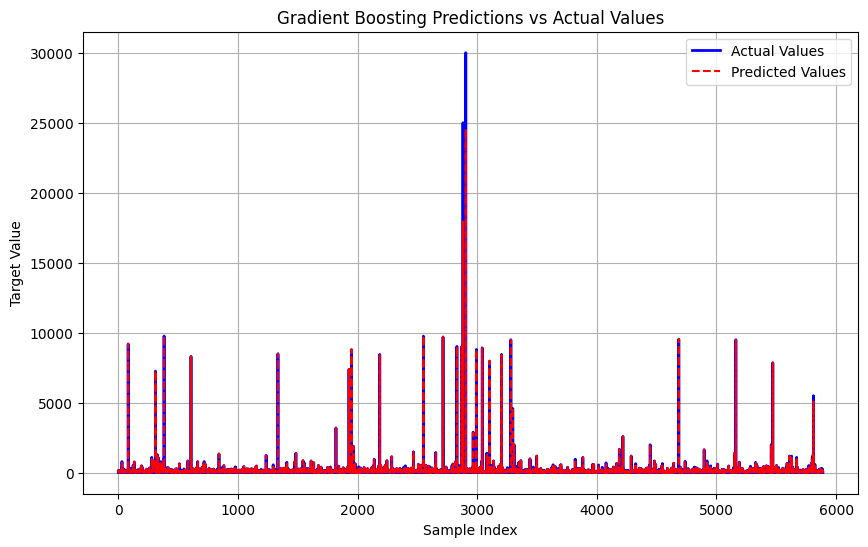

In [178]:
#Visualization of predictions for each model
def plot_predictions(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(y_test)), y_test, label="Actual Values", color="blue", linewidth=2)
    plt.plot(np.arange(len(y_pred)), y_pred, label="Predicted Values", color="red", linestyle='--')
    plt.title(f"{model_name} Predictions vs Actual Values")
    plt.xlabel("Sample Index")
    plt.ylabel("Target Value")
    plt.legend()
    plt.grid()
    plt.show()

for model_name, model in models.items():
    print(f"Visualizing predictions for {model_name}...")
    plot_predictions(model, X_test, y_test, model_name)
